# Cleaning Datasets

Data comes in many forms, most of it messy.
Most of the datasets that we will be working with require some pre-processing, so that's why we want to spend time in this tutorial to ensure you understand how to take a messy dataset and get it into a ready to analyse sate.


## Load in and visually inspect the data

The dataset that we will be working with shows the life expectancy for each country from 1800.

Once the data in read in it is a good idea to inspect it using .head() to try and get a feel of what the data looks like. 



In [0]:
from __future__ import print_function
import pandas as pd 
import numpy as np

In [0]:
#Read the file into a DataFrame
df = pd.read_csv("https://ai-camp-content.s3.amazonaws.com/lifeExpectancy.csv")

#We can view the first 5 rows of the dataframe using .head() - try it below
df.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,40.53,40.98,41.46,41.96,42.51,43.11,43.75,44.45,45.21,46.02,46.87,47.74,48.62,49.5,49.3,49.4,49.5,48.9,49.4,49.7,49.5,48.6,50.0,50.1,50.4,51.0,51.4,51.8,52.0,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,70.54,70.86,71.14,71.39,71.63,71.88,72.15,72.42,72.71,72.96,73.14,73.25,73.30,73.3,73.4,73.6,73.6,73.6,73.7,73.8,74.1,74.2,74.2,74.7,75.1,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,57.13,58.28,59.56,60.92,62.31,63.69,64.97,66.15,67.18,68.04,68.75,69.33,69.81,70.2,70.5,70.9,71.2,71.4,71.6,72.1,72.4,72.6,73.0,73.3,73.5,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [0]:
#You can also pass a number in as a parameter to head to view a custom amout of rows
#Try viewing the first 10 rows of the dataset
df.head(10)

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,27.82,...,40.53,40.98,41.46,41.96,42.51,43.11,43.75,44.45,45.21,46.02,46.87,47.74,48.62,49.5,49.3,49.4,49.5,48.9,49.4,49.7,49.5,48.6,50.0,50.1,50.4,51.0,51.4,51.8,52.0,52.1,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,70.54,70.86,71.14,71.39,71.63,71.88,72.15,72.42,72.71,72.96,73.14,73.25,73.30,73.3,73.4,73.6,73.6,73.6,73.7,73.8,74.1,74.2,74.2,74.7,75.1,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,57.13,58.28,59.56,60.92,62.31,63.69,64.97,66.15,67.18,68.04,68.75,69.33,69.81,70.2,70.5,70.9,71.2,71.4,71.6,72.1,72.4,72.6,73.0,73.3,73.5,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.2,70.2,70.2,70.5,70.5,70.6,70.7,70.8,71.0,71.4,71.7,71.7,71.7,71.7,71.8,72.0,72.2,72.4,72.7,71.3,72.8,72.6,72.6,72.7,72.8,72.9,73.00
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.7,81.8,81.9,82.2,82.3,82.6,82.8,83.1,83.3,83.5,83.7,83.9,84.1,84.2,84.1,84.3,84.4,84.5,84.6,84.6,84.7,84.7,84.7,84.8,84.8,84.8,84.80
7,Angola,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,26.98,...,45.12,45.50,45.84,46.14,46.42,46.69,46.96,47.23,47.50,47.75,47.99,48.20,48.40,48.6,49.3,49.6,48.4,50.0,50.9,51.3,51.7,51.8,51.8,52.3,52.5,53.3,53.9,54.5,55.2,55.7,56.2,56.7,57.1,57.6,58.1,58.5,58.8,59.2,59.6,60.00
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,An

## Viewing more
From running the above code, you will probably notice that head doesn't actually let us view all the columns - as there are so many, so we need to view the data another way. 
<br>
For example, we could use .shape or .column to find out more.

<br>

*  **Shape** allows us to see the shape of the dataframe we are working with by showing us the number of rows and columns

* **Columns** returns a list of all the columns in the dataframe

In [0]:
# Print the shape of df using .shape
df.shape

(999, 218)

In [0]:
# Print the columns of df using .columns
df.columns

Index(['Life expectancy', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=218)

## Further  diagnosis

The info() method provides important information about a DataFrame, such as the number of rows, number of columns, number of non-missing values in each column and the data type stored in each column.

In [0]:
#Use the .info() function on the dataframe to find out additional information about it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 218 entries, Life expectancy to 2016
dtypes: float64(217), object(1)
memory usage: 1.7+ MB


## Calculating Summary Statistics
Another important function to use when getting an understanding of our data is the  .describe() function. 

<br>

This returns data for numeric columns and can tell us things like the total count, the mean, standard deviation, min/max etc.


In [0]:
#Call the .describe() function on the dataframe
df.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,...,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.00000,209.000000,209.000000,210.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.00000,208.000000
mean,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,31.615970,31.573134,31.376766,31.310448,31.521741,31.481891,31.472736,31.467214,31.516318,31.647413,31.627512,31.721542,31.574726,31.488607,31.560796,31.620597,31.722090,31.770647,31.709005,31.666816,31.597313,31.633582,31.577861,31.559950,31.640100,31.604776,31.569204,31.564328,31.551990,31.674428,31.640697,31.580647,31.641294,31.631741,...,62.031089,62.420000,62.830297,63.220446,63.657772,64.083614,64.445644,64.814455,65.131683,65.545792,65.868069,66.144406,66.402475,66.784615,66.844663,67.026875,67.092500,67.006106,67.220000,67.412404,67.623541,67.762344,67.934880,68.077703,68.437943,68.653254,68.93555,69.184211,69.524019,69.850190,70.139712,70.447163,70.767740,70.969904,71.324375,71.663077,71.916106,72.088125,72.32101,72.556635
std,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,4.039261,3.917339,4.017228,3.972970,3.821229,3.745395,3.842306,3.758389,3.810340,4.063246,4.046057,4.245205,4.542525,4.545624,4.453902,3.983287,4.205397,4.303869,4.144827,4.102705,4.020460,4.114650,3.936358,3.886279,3.996987,3.943266,3.952972,4.048878,3.874715,4.104158,4.075289,3.975973,4.001474,4.053380,...,10.101591,9.966088,9.820317,9.579715,9.336773,9.182230,9.023134,8.970940,8.917492,8.791604,8.699797,8.638336,8.605859,8.542711,8.521308,8.575423,8.653851,9.409205,8.859096,8.985482,9.138496,9.255394,9.317722,9.586079,9.393088,9.437280,9.40794,9.351742,9.266814,9.102796,8.953255,8.800452,8.610341,8.898859,8.376540,8.217466,8.120852,8.074990,7.90202,7.738535
min,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,23.390000,23.390000,12.480000,13.430000,23.390000,23.390000,23.000000,23.390000,23.390000,23.390000,23.390000,23.390000,5.500000,1.500000,6.500000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,23.000000,20.380000,23.390000,23.390000,23.390000,23.390000,23.390000,23.390000,...,18.100000,19.550000,21.910000,28.160000,38.000000,42.930000,42.500000,39.460000,35.430000,41.390000,43.950000,44.400000,44.820000,45.200000,45.400000,45.300000,45.100000,13.200000,43.800000,44.300000,44.000000,45.300000,45.000000,37.600000,44.900000,45.100000,44.00000,43.000000,42.500000,43.100000,43.300000,44.500000,45.500000,32.200000,46.700000,46.100000,45.600000,45.400000,47.10000,48.860000
25%,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,29.000000,29.000000,28.950000,28.820000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,28.950000,28.950000,28.950000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,28.950000,29.000

## Frequency counts for categorical data
So the .describe() function that we used above only works on numeric columns, but if we want to spot issues when working with categorical data we can use .value_counts() - which returns the frequency counts for each unique value in a column

In [0]:
df['Life expectancy'].value_counts(dropna=False)

NaN                       739
Jordan                      1
Marshall Islands            1
Montenegro                  1
Vietnam                     1
Algeria                     1
St. Martin                  1
Germany                     1
Somalia                     1
Guyana                      1
Antigua and Barbuda         1
Serbia                      1
Sierra Leone                1
St. Kitts and Nevis         1
Cyprus                      1
Namibia                     1
Ireland                     1
Slovak Republic             1
Azerbaijan                  1
Luxembourg                  1
Zimbabwe                    1
Panama                      1
South Yemen (former)        1
British Virgin Islands      1
Hong Kong, China            1
Mauritius                   1
Channel Islands             1
USSR                        1
Kiribati                    1
Guam                        1
                         ... 
Syria                       1
Bermuda                     1
Kosovo    

From using value_counts we can also see that there are 739 Life Expectany values that are marked as NaN(Empty) - We will discuss handling this missing data later.

## Visualizing Data
So far, we have been looking at descriptive statistics of the data. A great way to confirm what the numbers are telling you is to plot and visualize the data.

We are going to use matplotlib to create charts to display the data.

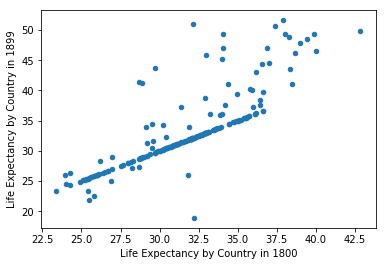

In [0]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create the scatter plot
df.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Display the plot
plt.show()

## Challenge:
1. Create a Scatter Graph that shows the life expectany by country in  2010 and 2016 .

Text(0, 0.5, 'Life Expectancy by Country in 2016')

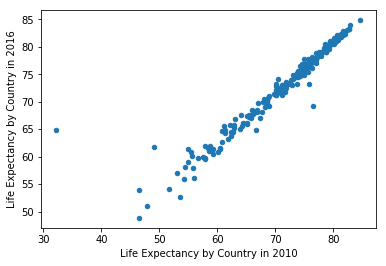

In [0]:
#Create the scatter plot 
df.plot(kind='scatter', x='2010', y='2016')

#Axis labels
plt.xlabel('Life Expectancy by Country in 2010')
plt.ylabel('Life Expectancy by Country in 2016')

## Tidying data for analysis

Data is considered tidy if it meets the following 3 principles:
1. Columns represent separate variables
2. Rows represent separate observations
3. Observational units form tables

<br>

Currently our dataframe has a separate column for each of the years.  This currently breaks the rules of tidy data, as each column contains values rather than variables. The reason why we would rather have a single column containing all the years and have it represent the average life expectancy for each year is that it makes it better to use as a predictor variable in later analysis. To achieve this we need to  **re-shape** the data.
<br>

## Re-Shaping Data

To do this task we can make use of the pandas function .melt() which can unpivot a dataframe from wide format to long format.

.melt() takes two parameters:
1. The data frame we are using 
2. id_vars - which are the columns that we want to keep constant

Then it will change all the columns expect for the ones you have specified as the id_vars

pd.melt(frame=dataframe, which columns you want to keep constant)

In [0]:
# Melt the dataframe by passing in the dataframe and any columns you think don't need to change
df = pd.melt(frame= df , id_vars= "Life expectancy")

# We can now rename the columns using the code below
df.columns = ['country', 'year', 'life_expectancy']

# Print the head of melted dataframe
df.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


## Check data types
Now that the dataframe is in the proper shape, we need to ensure that all the columns are of the proper data types. 

We would expect country to be of  type object, year of type int, and life_expectancy is of type float.
<br>

To check what the types of each column is at the minute we can call .dtypes on the dataframe


In [0]:
#Check the types of the data in the dataframe
#df["country"].dtypes
df['year'].dtypes
#df['life_expectancy'].dtypes

dtype('O')

## Converting Data-types
From viewing the data we can see that year is actually of type object, so we will need to convert this into an integer.

There are a range of pandas functions that can help us when we need to convert data from one type to another including:

- to_numeric('column name') - This will convert all values to be numeric. however, sometimes when converting strings to numeric values, there can be issues in case like maybe an empty record as be stored as a '-' or maybe some of the numbers have a symbol with them. To get around this we use the parameter errors='corce'
- astype(type) - can be used to convert data into a number of different types e.g we can use .astype(str) to convert to a string or .astype('category') to make it a categorical variable



In [0]:
# Convert the year column to be numeric by passing in the column name and the error value if required
df.year = pd.to_numeric(df['year'], errors='corce')

#Check the types of the dataframe to ensure this worked
df.dtypes

country             object
year                 int64
life_expectancy    float64
dtype: object

## Checking Values are consistent

As our country names are all text we would like to assume that they all have the following characteristics:

- The countries start with an uppercase letter and then the rest of the characters are lower.
- There is Whitespace between words.
- There are Periods for any abbreviations.

<br>

There are a number of ways to enforce different rules like this
1.  .lower() - convert all values to lowercase 
2. .upper() - convert everything to uppercase
3. .title() - Make the start of each word begin with a capital letter and have the rest lowercase
4. We could also use Regular Expressions to specify the exact rules in a particular sequence.


In [0]:
df['country'] = df['country'].astype(str)

In [0]:
#Start by picking the apporiate method from above to make the counties start with a capital letter
df['country'] = df['country'].str.title()

#Print the head of the country coulmn to check if it worked
df.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri And Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


## Regular Expressions

Regular Expressions also known as RegEx is a formal way of specifying a pattern.

Example:

If we had a column containing monetary values, the values may be added in a range of different ways 
- 15
-£18.00
- £17.876

To be able to force these to all follow the same pattern we can use regex to specify the pattern


- **\d***  - Must contain all digits, so in this case only 15 would be accepted

- **\£\d*\.\d**** - Every value would need to start with a '£' then be followed by any amount of numbers, it then must contain a period '.' and after the period it must contain digits

- **\£\d*\.\d{2} *** - Every value  needs to start with a '£' then be followed by any amount of numbers, it then must contain a period '.' and after the period it must contain only 2 digits.

<br>

So that was an example with numbers, but for countries we are working with text, so there are a range of other patterns we can use e.g. 
- **A-Z** - Any capital letters 
- **a-z** - Any lowercase letters 
- **AZa-z** - Contains both uppercase and lowercase letters 
- **\\.** - contains a period 
-**\s** - contains a space

Once you have created your regex string you need to wrap a carrot ''^'' and a dollar sign '$'
<br>

For example:


     ^regex-pattern-here$
     
<br>
The ^ tells us to start the pattern match at the beginning of the value and the $ tells us to match at the end of the value.
  



In [0]:
#Import RegEx
import re

#Create a regex string to make sure the countrys can only contain uppercase and lowercase letters, periods and spaces
pattern = '[^a-zA-Z\s\.]+'

#This will take the pattern and apply it to each value in column, 
#If it comes across a symbol that is not a upper/lowercase letter, a period or a space it replaces it with a space
df['country'] = df['country'].apply(lambda x: re.sub(pattern,'',x))

df.head(50)                                    

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri And Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
5,American Samoa,1800,NaN
6,Andorra,1800,NaN
7,Angola,1800,26.98
8,Anguilla,1800,NaN
9,Antigua And Barbuda,1800,33.54


## Missing Data

It's now time to deal with the missing data. There are several strategies for this:
- You can drop all missing values 
- Fill them in missing values using the mean of the column or row that the missing value is in
- You can use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column.


### Dropping missing values
We could drop the values using:
<br>
.dropna( axis=0)
<br>

For the axis parameter 0= rows and 1= columns


### Replacing missing values with the mean
First you need to calculate the mean of the column  with
<br>
mean = df['column'].mean()

<br>
The you can replace all the missing values in the column with the mean using
<br>
df['column'].fillna(mean)


###Foward/backward fill 

df.ffill() to forward fill or df.bfill() to backward fill 

<br>

In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data results.

In [0]:
#Print the shape of the dataframe
df.shape

(216783, 3)

In [0]:
# Try dropping the empty values
df=df.dropna()

# Print the shape to see if anything wsa dropped
df.shape

(43857, 3)

## Viewing The Clean Data

In [0]:
# We can group data together by using the groupby method 
#The following groups the dataframe by 'year' and aggregate 'life_expectancy' by the mean. 
df_agg = df.groupby('year')['life_expectancy'].mean()

# Print the head of df_agg
df_agg.head()

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64

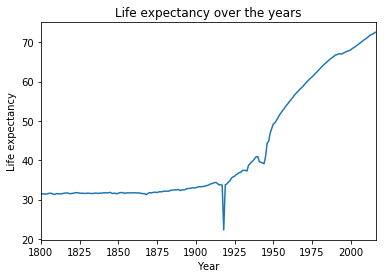

In [0]:
# Create a line plot of life expectancy per year - you don't need to include any parameters to do this, you can just call plot on your groped data
df_agg.plot(x='year', y='life_expectacny')

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.show()


## Saving the newly clean dataset

You might want to save a copy of the clean version of the data set in case want to use it in the furture, to do this we just need to use the .to_csv function and give them a filename.

In [0]:
# Save the DataFrames to a csv file
df.to_csv('df.csv')


## Exercise
Try out some of the new techniques that you are learnt about cleaning data on the following dataset:

In [0]:
#Read the file into a DataFrame
df = pd.read_csv("https://ai-camp-content.s3.amazonaws.com/Candy.csv")